**Fine-Tuning:** In fine-tuning, the pre-trained model’s parameters are further trained (fine-tuned) on the target task’s dataset along with the additional layers. It consists in unfreezing some layers of a frozen pre-trained base model and jointly training both the newly added classifier layers and the last layers of the base model. This allows evolving not only the additional layers but also some of the earlier layers of the pre-trained model to better suit the target.

In [1]:
# Helper function (U can make ur own)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-08 19:05:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-07-08 19:05:49 (8.39 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, compare_historys

https://keras.io/api/applications/

## Import data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-08 19:05:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.5MB/s    in 8.3s    

2024-07-08 19:06:07 (19.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE,)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
len(train_data_10_percent)

24

In [11]:
train_data_10_percent.class_names # they automatically getting label name from folder

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
# Example of batch of data
for images, labels in train_data_10_percent.take(1): # taking 1 batch
  print(images,labels)

tf.Tensor(
[[[[237.31442   245.8007    254.61256  ]
   [241.34694   244.7905    248.85873  ]
   [249.82558   248.82558   246.38074  ]
   ...
   [247.76886   249.22552   239.08551  ]
   [244.5172    250.74556   239.2762   ]
   [235.58891   248.33064   239.91873  ]]

  [[241.43208   249.26978   249.71365  ]
   [245.94707   249.45886   245.76562  ]
   [246.32494   247.13298   238.5708   ]
   ...
   [247.19357   247.5909    243.37724  ]
   [242.83803   247.71878   243.32787  ]
   [240.66794   250.57425   249.03851  ]]

  [[247.3023    253.28444   243.27106  ]
   [254.39413   254.61638   243.60745  ]
   [248.73087   250.51848   237.16486  ]
   ...
   [248.42218   248.85612   248.65079  ]
   [250.84673   252.0601    254.13123  ]
   [245.38173   250.36388   254.35208  ]]

  ...

  [[248.7628    253.0517    247.77171  ]
   [251.21494   254.35779   250.21494  ]
   [249.966     254.18094   249.39078  ]
   ...
   [251.62033   253.83363   249.47356  ]
   [250.87367   251.86952   246.87367  ]
   [2

## Funtional API (Model 0)

In [13]:
# 1. Create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name = "input_layer")

# 4. If using ResNet50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model

x = base_model(inputs)
print(f"Shape after passing inputs through base model : {x.shape}")

# 6. Averate pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layers")(x)
print(f"Shape after GlobalAveragePooling2D : {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps=int(0.25*len(test_data)), # only 25%
                        epochs = 5,
                        callbacks = [create_tensorboard_callback("transfer_learning",
                                                                 experiment_name = "10_percent_feature_extraction")])







16705208/16705208 [==============================] - 2s 0us/step
Shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D : (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240708-190618
Epoch 1/5
24/24 [==============================] - 17s 259ms/step - loss: 1.9066 - accuracy: 0.3987 - val_loss: 1.3131 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 5s 180ms/step - loss: 1.1079 - accuracy: 0.7627 - val_loss: 0.8722 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 4s 126ms/step - loss: 0.7938 - accuracy: 0.8387 - val_loss: 0.7001 - val_accuracy: 0.8306
Epoch 4/5
24/24 [==============================] - 4s 169ms/step - loss: 0.6376 - accuracy: 0.8587 - val_loss: 0.6278 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 4s 162ms/step - loss: 0.5433 - accuracy: 0.8880 - val_loss: 0.5584 - val_accuracy: 0.8569


In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 ers (GlobalAveragePooling2                                      
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

In [15]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.5498 - accuracy: 0.8668


[0.5498273372650146, 0.8668000102043152]

In [16]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [17]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

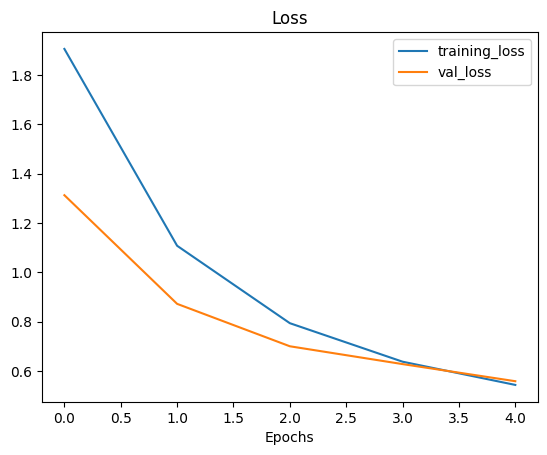

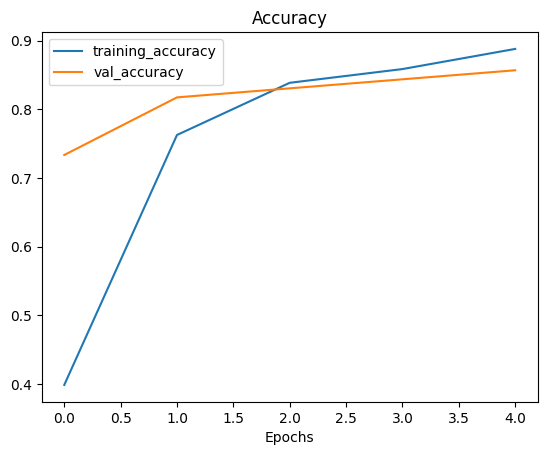

In [18]:
plot_loss_curves(history_0)

In [19]:
## Example : Getting a feature vector from a trained model

input_shape = (1,4,4,3) # batch, height, width, color_channels

input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor : \n {input_tensor}\n")

# pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor : \n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor : {input_tensor.shape}")
print(f"Shape of 2D global average pooled random tensor : {global_average_pooled_tensor.shape}")


Random input tensor : 
 [[[[-0.20855182 -1.2832743  -1.7743516 ]
   [-1.4238875   0.9724878  -0.9118229 ]
   [ 0.46060067 -0.537685   -0.48566112]
   [ 0.7854041  -0.65663415  1.0536038 ]]

  [[-1.3257682  -0.476231   -0.7121818 ]
   [ 0.49427006  0.24472818  1.2220107 ]
   [-1.2982532  -1.2905014   0.59709144]
   [ 0.79312646 -2.1234655  -0.5866247 ]]

  [[ 1.7679017  -0.6391648   0.87667483]
   [-0.7756129   0.09413682 -0.71879077]
   [-1.1726545   0.03473768 -0.25383317]
   [ 1.7334107  -0.1516729  -1.02286   ]]

  [[-1.2780045  -0.4310229   1.4666591 ]
   [ 0.2139591  -1.8322514   0.57698184]
   [-0.37449393 -0.47877732  0.9007988 ]
   [ 0.9780047  -1.5764141   0.05917624]]]]

2D global average pooled random tensor : 
 [[-0.03940933 -0.6331878   0.01792942]]

Shape of input tensor : (1, 4, 4, 3)
Shape of 2D global average pooled random tensor : (1, 3)


## Transfer learning experiments

* **Model 1:** Use feature extraction transfer learning on 1% of the training data with data augmentation.
* **Model 2:** Use feature extraction transfer learning on 10% of the training data with data augmentation and save the results to a checkpoint.
* **Model 3:** Fine-tune the Model 2 checkpoint on 10% of the training data with data augmentation.
* **Model 4:** Fine-tune the Model 2 checkpoint on 100% of the training data with data augmentation.

#### Model 1

In [20]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-07-08 19:07:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  23.6MB/s    in 6.6s    

2024-07-08 19:07:23 (19.4 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
unzip_data("10_food_classes_1_percent.zip")

In [22]:
# Create training and test dir

train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [23]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [24]:
# Setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_1_precent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           label_mode ="categorical",
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                image_size=IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = "categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

To Add data augmentation right into our models, we can use the layer inside




In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [26]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # Some pre-trained dont need rescaling because its come with bulld in
], name = "data_augmentation")



(-0.5, 484.5, 458.5, -0.5)

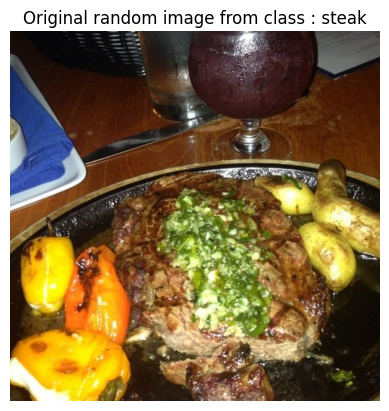

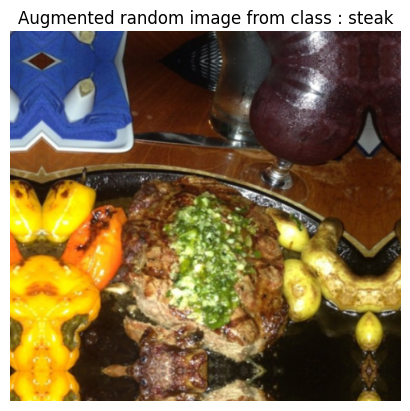

In [27]:
# Visualize our augmented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_precent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class : {target_class}")
plt.axis(False)

# Plot augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class : {target_class}")
plt.axis(False)

In [28]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape,name="input_layer")

# Add data augmentation Sequential model as layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training = False)

# pool layer
x = layers.GlobalAveragePooling2D()(x)

# Dense layers
outputs = layers.Dense(10, activation = "softmax", name = "Output_layer")(x)

model_1 = keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data_1_precent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_precent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                experiment_name = "1_percent_data_aug")])



Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240708-190730
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3943 - accuracy: 0.0714 - val_loss: 2.2105 - val_accuracy: 0.1776
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1177 - accuracy: 0.2000 - val_loss: 2.0838 - val_accuracy: 0.2829
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9432 - accuracy: 0.4143 - val_loss: 1.9709 - val_accuracy: 0.3405
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7449 - accuracy: 0.5857 - val_loss: 1.8760 - val_accuracy: 0.3947
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.5733 - accuracy: 0.6857 - val_loss: 1.7848 - val_accuracy: 0.4474


In [29]:
IMG_SIZE + (3,)

(224, 224, 3)

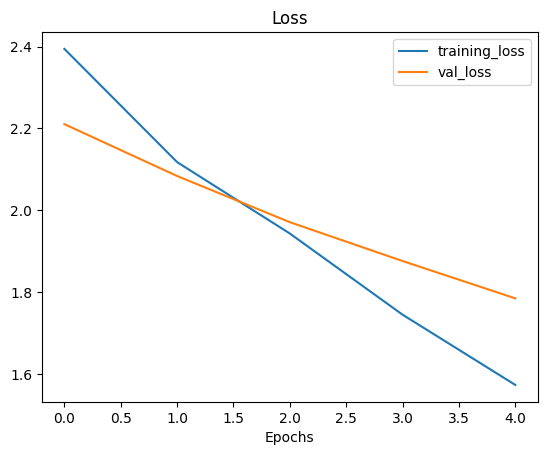

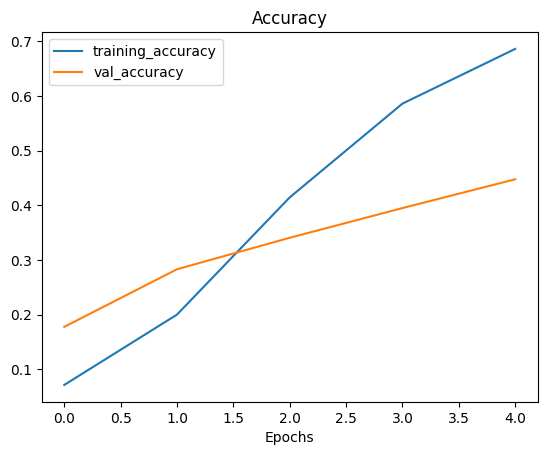

In [30]:
plot_loss_curves(history_1)

In [31]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                           

In [32]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 1.7897 - accuracy: 0.4660


[1.7896969318389893, 0.4659999907016754]

## Model_2

In [33]:
# Get 10% data
#!https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir_10_percent = "10_food_classes_10_percent/test"

In [34]:
import tensorflow as tf
IMG_SIZE = (224,224)

In [35]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode ="categorical",
                                                                            image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [36]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [37]:
# Create model 2 with data augmentation built in

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name = "data_augmentation")


In [38]:
input_shape = (224,224,3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape,name="input_layer")

x = data_augmentation(inputs)

x = base_model(x,training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_2 = keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


### Creating a ModelCheckpoint callback

In [39]:
# Set chackpoint path

checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoints.ckpt"

# Create a model_checkpoints callback that saves the model's weights only

checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                          save_weights_only = True,
                                                          save_best_only = False,
                                                          save_freq ="epoch", # Save every epoch
                                                          verbose = 1)

In [40]:
# this model saving checkpoints every epoch
history_2 = model_2.fit(train_data_10_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = int(0.25*len(test_data)),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                    experiment_name = "10_percent_data_aug"),
                         checkpoints_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240708-190811
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9811 - accuracy: 0.3533
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 31s 1s/step - loss: 1.9811 - accuracy: 0.3533 - val_loss: 1.4280 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2978 - accuracy: 0.7133
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 18s 721ms/step - loss: 1.2978 - accuracy: 0.7133 - val_loss: 0.9926 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9965 - accuracy: 0.7733
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 18s 725ms/step - loss: 0.9965 - accuracy: 0.7733 - val_loss: 0.7953 - val_accuracy: 0.8191
E

In [41]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 63ms/step - loss: 0.6241 - accuracy: 0.8480


[0.624075710773468, 0.8479999899864197]

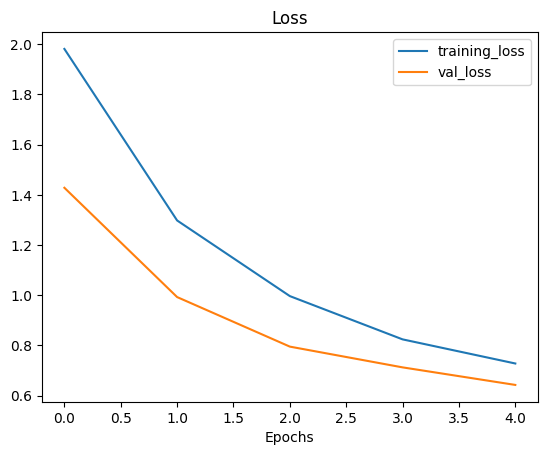

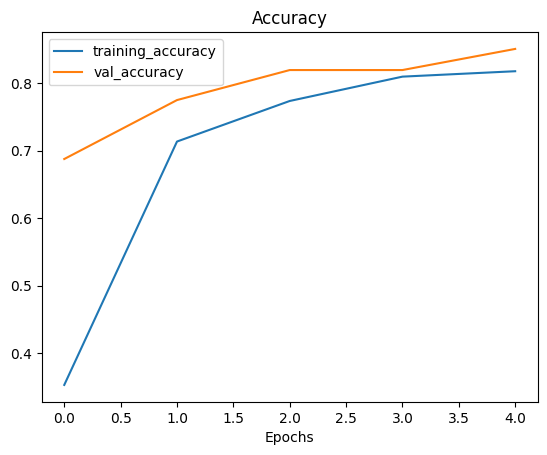

In [42]:
plot_loss_curves(history_2)

In [43]:
# Loding in checkpointed weights
model_2.load_weights(checkpoint_path)


In [44]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 74ms/step - loss: 0.6241 - accuracy: 0.8480


[0.624075710773468, 0.8479999899864197]

### Continue training using model checkpoints


In [45]:
model_2.load_weights(checkpoint_path)


history_2_checkpoint = model_2.fit(train_data_10_percent,
            initial_epoch = 5,
            epochs = 10, # more 5
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = int(0.25*len(test_data)),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                    experiment_name = "10_percent_data_aug"),
                         checkpoints_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240708-191033
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6505 - accuracy: 0.8360
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 17s 687ms/step - loss: 0.6505 - accuracy: 0.8360 - val_loss: 0.6065 - val_accuracy: 0.8438
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.6034 - accuracy: 0.8573
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 16s 664ms/step - loss: 0.6034 - accuracy: 0.8573 - val_loss: 0.5952 - val_accuracy: 0.8355
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.8600
Epoch 8: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 14s 587ms/step - loss: 0.5552 - accuracy: 0.8600 - val_loss: 0.5369 - val_accuracy: 0.

## Fine Tuning

In [46]:
model_2.layers


In [47]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e5464cd4a00> True
<keras.src.engine.sequential.Sequential object at 0x7e5464cd5de0> True
<keras.src.engine.functional.Functional object at 0x7e5468044ac0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e54595b7b50> True
<keras.src.layers.core.dense.Dense object at 0x7e5458227bb0> True


In [48]:
# What layers are in our base_model (EfficientNetB0) and are they trainable?

for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [49]:
# How many trainable vairables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [50]:
# Let's fine-tune last 10 layers
base_model.trainable = True

# Freez all layers except for last 10 layser
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [51]:
# Recompile (We have to recompile our models every time we make a change)
model_2.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), # when fine-tuning rudece the learning by 10X
                metrics = ["accuracy"])

In [52]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)


0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [53]:
print(len(model_2.layers[2].trainable_variables))

10


In [54]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [55]:
history_fine = model_2.fit(train_data_10_percent,
                           epochs=20,
                           validation_data = test_data,
                           validation_steps = int(0.25*len(test_data)),
                           initial_epoch = history_2_checkpoint.epoch[-1], # start from last epoch
                           callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                    experiment_name = "10_percent_data_aug"),
                                      checkpoints_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240708-191156
Epoch 10/20
24/24 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.8893
Epoch 10: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 26s 668ms/step - loss: 0.4315 - accuracy: 0.8893 - val_loss: 0.5095 - val_accuracy: 0.8421
Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8947
Epoch 11: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 14s 548ms/step - loss: 0.3525 - accuracy: 0.8947 - val_loss: 0.4554 - val_accuracy: 0.8553
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.9107
Epoch 12: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 15s 592ms/step - loss: 0.3043 - accuracy: 0.9107 - val_loss: 0.4547 - val_accura

In [56]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.4022 - accuracy: 0.8644


[0.4021838903427124, 0.8644000291824341]

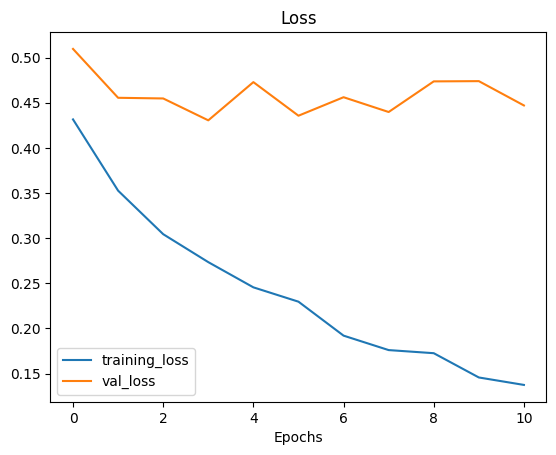

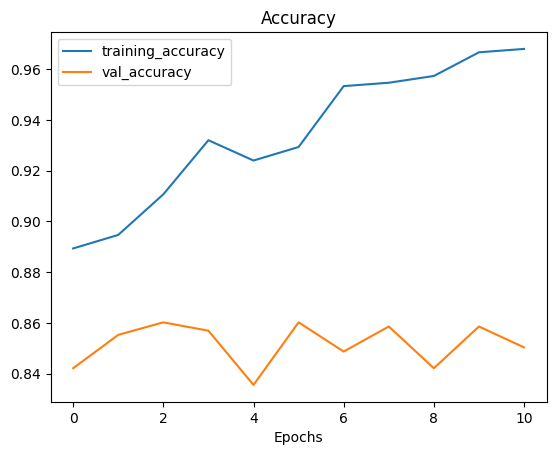

In [57]:
plot_loss_curves(history_fine)

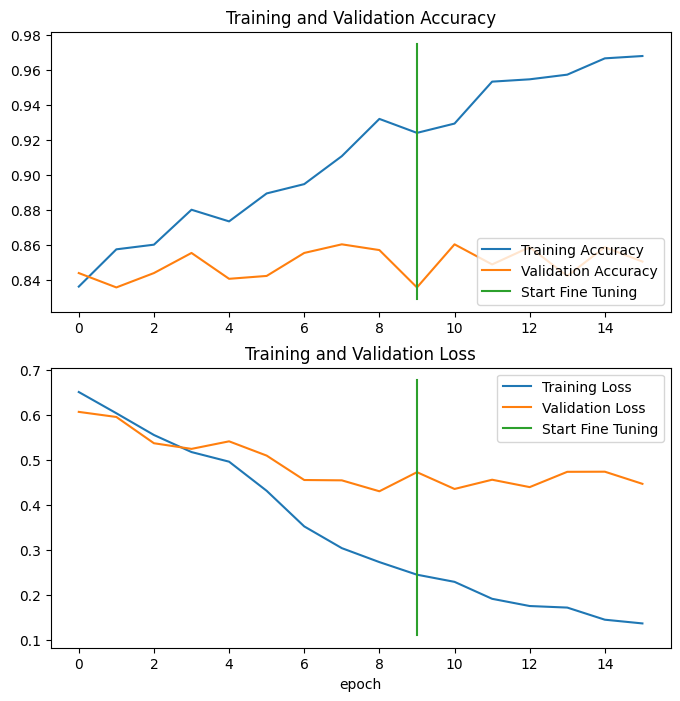

In [58]:
compare_historys(history_2_checkpoint, history_fine,initial_epochs=10)

### Model 4: Fine-Tuning

In [60]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-07-08 19:20:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  15.9MB/s    in 33s     

2024-07-08 19:20:47 (15.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
unzip_data("10_food_classes_all_data.zip")

In [63]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [64]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [66]:
# Setupt data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode ="categorical",
                                                                            image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [67]:
model_2.load_weights(checkpoint_path)

In [68]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.4022 - accuracy: 0.8644


[0.40218386054039, 0.8644000291824341]

In [69]:
for layer_number , layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 output_layer True


In [70]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [71]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])


In [73]:
fine_tune_final = model_2.fit(train_data_10_classes_full,
                              epochs = 30,
                              validation_data = test_data,
                              validation_steps = int(0.25* len(test_data)),
                              initial_epoch = history_fine.epoch[-1],
                              callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                    experiment_name = "10_percent_data_aug"),
                                      checkpoints_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240708-193723
Epoch 20/30
235/235 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.8303
Epoch 20: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
235/235 [==============================] - 85s 357ms/step - loss: 0.5369 - accuracy: 0.8303 - val_loss: 0.2945 - val_accuracy: 0.9013
Epoch 21/30
235/235 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8547
Epoch 21: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
235/235 [==============================] - 71s 298ms/step - loss: 0.4622 - accuracy: 0.8547 - val_loss: 0.2870 - val_accuracy: 0.9030
Epoch 22/30
235/235 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.8647
Epoch 22: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
235/235 [==============================] - 65s 276ms/step - loss: 0.4156 - accuracy: 0.8647 - val_loss: 0.2919 

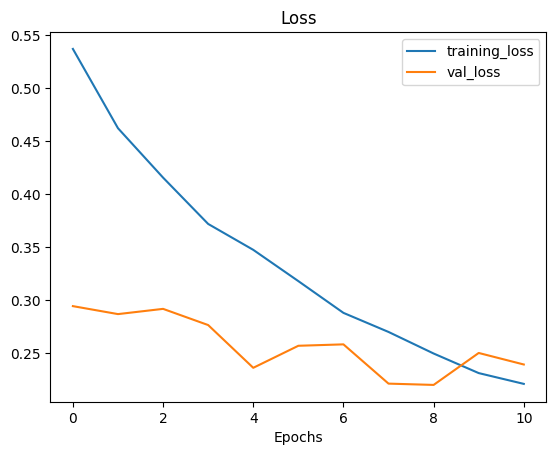

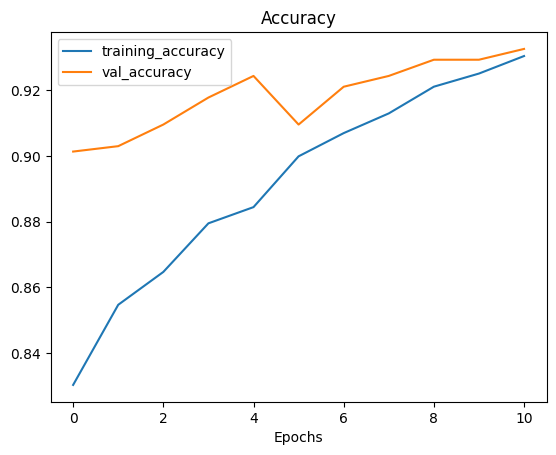

In [74]:
plot_loss_curves(fine_tune_final)